In [169]:
from warnings import filterwarnings  #uyarı mesajlarını görmezden geliyoruz.
filterwarnings('ignore')

**BASİT DOĞRUSAL REGRESYON**

import pandas as pd
ad = pd.read_excel("güncellenmiş_veriSeti.xlsx", usecols=[0, 2,3,6])
df = ad.copy()
df.head()

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 41.9 KB


In [172]:
df.isnull().values.any() #eksik değer olup olmadığını değerlendirelim

False

In [173]:
df.corr() #değişkenlerin korelasyonlarını incelememizi sağlar

,age,bmi,children,charges
age,1.000000,0.099255,0.064242,0.284585
bmi,0.099255,1.000000,0.003858,0.200596
children,0.064242,0.003858,1.000000,0.079189
charges,0.284585,0.200596,0.079189,1.000000


-->"age" ve "charges" arasındaki korelasyon (0.284585):
Pozitif bir korelasyon vardır, yani yaş arttıkça sigorta ücretleri de artma eğilimindedir.

-->"bmi" ve "charges" arasındaki korelasyon (0.200596):
Yine pozitif bir korelasyon vardır, yani Vücut Kitle İndeksi (BMI) arttıkça sigorta ücretleri de artma eğilimindedir.

-->"children" ve "charges" arasındaki korelasyon (0.079189):
Pozitif bir korelasyon vardır, ancak bu değer diğerlerine göre daha düşüktür. Yani çocuk sayısı arttıkça sigorta ücretleri de artma eğilimindedir, ancak bu ilişki daha zayıftır.

**scikit-learn ile Modelleme**

In [174]:
from sklearn.linear_model import LinearRegression

In [175]:
X = df[["bmi"]] # x bağımsız değişken,
y = df["charges"] #y bağımlı değişken

Burada X değerini kullanarak Y değerini tahmin etmeye çalışıyoruz.

In [176]:
X

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


In [177]:
y

0       16884.92400
1       13313.37510
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

reg = LinearRegression() #fit fonksiyonu, modelin eğitilmesini sağlar
model = reg.fit(X, y)

**y=b0 + b1*xi**  #Bu denklem, basit doğrusal regresyonun matematiksel temsilidir

In [178]:
model = LinearRegression()
model.fit(X, y)

model.intercept_ #sabit katsayıyı verir (bo)

1314.3109460589494

In [179]:
model.coef_ #bağımsız değişkene ait katsayıyı verir (b1)

array([391.2228497])

Yani bu demek oluyor ki Y=1314.3+391.2*x

**TAHMİN**

Örnek olarak; BMİ si 27 olan bir bireyin masraflarını bu denkleme göre hesaplamaya çalışalım

Y=1314.3+391.2*27=11876,7

In [180]:
model.predict([[27]]) #Tahmin için predict metodu kullanılır

array([11877.32788785])

In [181]:
yeni_veri = [[5],[50],[150]] #birden gözlem için tahmin #5,50 ve 150 değerlerine sahip 3 farklı gözlemi temsil eder.

In [182]:
model.predict(yeni_veri)

array([ 3270.42519454, 20875.45343087, 59997.73840048])

**Artıklar ve Makine Öğrenmesindeki Önemi**

In [183]:
from sklearn.metrics import mean_squared_error, r2_score #sklearn içerisinde kullanacağımız 2 metriği import ettik

In [184]:
y_pred=model.predict(X)

In [185]:
mse = mean_squared_error(y, y_pred)  #(mean squared error) (hata kareleri ortalaması)

In [186]:
mse

135802489.80531207

In [187]:
import numpy as np
rmse = np.sqrt(mse) #hata kareleri ortalaması karekökü

In [188]:
rmse

11653.43253317717

In [189]:
r2=r2_score(y, y_pred)

In [190]:
r2

0.04023891299916915

r2= Bağımsız değişkenin bağımlı değişkendeki değişkenliği açıklama başarısıdır. Yani elimizdeki BMİ değişkeni CHARGES değişkeninde yer alan değişkenliğin yaklaşık %40'ını açıklayabilmektedir.

In [191]:
Adj_r2 = 1 - ((1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1))

In [192]:
Adj_r2

0.03952052895201286

Düzeltilmiş r kare , r karenin her parametre eklenmesine karşı olan duyarlılığını düzenleyen, törpüleyen, duyarlılığı daha az olan bir metriktir. Dolayısıyla Adj. R-squared: (Düzeltilmiş R kare) değeri bizim için daha düzgün, önemli bir değer olacaktır.

In [193]:
model.predict(X)[0:10] #model aracılığı ile tahmin edilen değerler.Üretilen bağımlı değişkenin tahmini değerlerinin ilk 10 gözlemini içerir.

array([12229.42845258, 14525.9065803 , 14224.66498603, 10197.02574841,
       12612.82684528, 11384.38709724, 14396.8030399 , 12166.83279663,
       12984.48855249, 11423.50938221])

In [194]:
y[0:10]

0    16884.92400
1    13313.37510
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [195]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": model.predict(X)[0:10]}) 

In [196]:
k_t

,gercek_y,tahmin_y
0,16884.92400,12229.428453
1,13313.37510,14525.906580
2,4449.46200,14224.664986
3,21984.47061,10197.025748
4,3866.85520,12612.826845
5,3756.62160,11384.387097
6,8240.58960,14396.803040
7,7281.50560,12166.832797
8,6406.41070,12984.488552
9,28923.13692,11423.509382


Karşılaştırma amacıyla gerçek ve tahmin edilen 10 charges değerini dataframe'e aktarıyoruz.

In [197]:
residuals = y-y_pred
resid=residuals[0:10]

In [198]:
import matplotlib.pyplot as plt

 Bu satırlarda, gerçek bağımlı değişken değerleri (y) ile modelin yaptığı tahminlerin (y_pred) farkını alarak geriye kalan (hata) değerleri elde ediyoruz. Ve bu hata değerlerini görselleştiriyoruz.

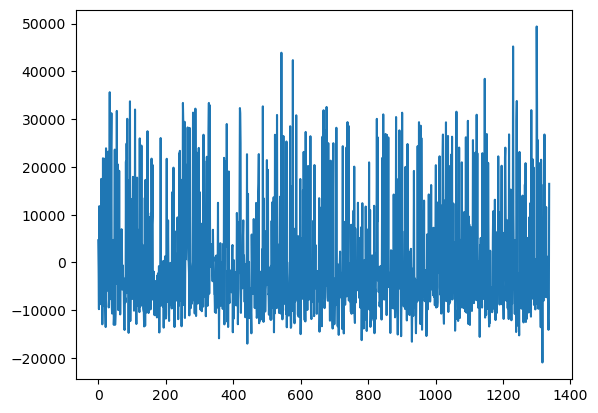

In [199]:
plt.plot(residuals)

**Doğrusal Olmayan Regreson Modelleri** 

**SINIFLANDIRMA MODELLERİ**

**KNN (K- EN YAKIN KOMŞU MODELİ)**

In [200]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [201]:
hit = pd.read_excel("güncellenmiş_veriSeti.xlsx")
df = hit.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.000000,female,27.900,0,yes,southwest,16884.92400
1,18.000000,male,33.770,1,no,southeast,13313.37510
2,28.000000,male,33.000,3,no,southeast,4449.46200
3,33.000000,male,22.705,0,no,northwest,21984.47061
4,39.047471,male,28.880,0,no,northwest,3866.85520


Değişkenlerin değerlerin sayısını ve kaç kez tekrarlandıklarını yazıyoruz.

In [202]:
df["sex"].value_counts()

sex
male      677
female    661
Name: count, dtype: int64

In [203]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [204]:
df["region"].value_counts()

region
southeast    365
southwest    325
northwest    325
northeast    323
Name: count, dtype: int64

In [205]:
#Kategorik değişkenler için one hot dönüşümü gerçekleştirdik  #true değerleri 1 false değerleri 0 yazdırıyoruz.
dms = pd.get_dummies(df[['sex', 'smoker', 'region']])
dms = dms.astype(int)
dms.head()


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [206]:
 #dummy tuzağına yakalandığımız için bu durumu ortadan bu şekilde kaldırmamız gerekiyor
dms = pd.get_dummies(df[['sex', 'smoker', 'region']], drop_first=True)
dms = dms.astype(int)
dms.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [207]:
y = df["charges"] # bağımlı değişkeni y'ye atadık

In [208]:
X_ = df.drop(["charges","sex","smoker","region"], axis = 1).astype("float64") #kategorik değişkenleri yazdırdık

In [209]:
X_

,age,bmi,children
0,19.000000,27.900,0.0
1,18.000000,33.770,1.0
2,28.000000,33.000,3.0
3,33.000000,22.705,0.0
4,39.047471,28.880,0.0
...,...,...,...
1333,50.000000,30.970,3.0
1334,18.000000,31.920,0.0
1335,18.000000,36.850,0.0
1336,21.000000,25.800,0.0


In [211]:
X = pd.concat([X_, dms], axis = 1)#sayısal bağımlı değişken ile düzenlediğimiz kategorik değişkenleri birleştirip X'e tüm bağımsız değişkenleri atmış oluyoruz
dms = dms.astype(int)
X = X.fillna(0)
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.000000,27.900,0.0,0,1,0,0,1
1,18.000000,33.770,1.0,1,0,0,1,0
2,28.000000,33.000,3.0,1,0,0,1,0
3,33.000000,22.705,0.0,1,0,1,0,0
4,39.047471,28.880,0.0,1,0,1,0,0


**TAHMİN**

In [217]:
y_pred = knn_model.predict(X_test)

In [218]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred)) #Gerçek y_test değerleri ile modelin tahmin ettiği y_pred değerleri arasındaki ortalama karesel hatayı hesaplar.

In [219]:
rmse

11767.326026355116

#farklı k değerlerine karşılık eğitim rmse hatası nasıl değişiyor kontrol edelim

In [220]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  740.0483068588311
k = 2 için RMSE değeri:  6586.743550726094
k = 3 için RMSE değeri:  7937.096233321588
k = 4 için RMSE değeri:  8852.887807380208
k = 5 için RMSE değeri:  9218.738741646679
k = 6 için RMSE değeri:  9622.151395598066
k = 7 için RMSE değeri:  9749.495285584351
k = 8 için RMSE değeri:  9916.079750959272
k = 9 için RMSE değeri:  10058.914025664913
k = 10 için RMSE değeri:  10135.822742223361


**MODEL TUNİNG**

In [221]:
from sklearn.model_selection import GridSearchCV

In [222]:
knn_params = {'n_neighbors': np.arange(1,20,1)} # bir sözlük yapısı oluşturuyoruz
#metodun aldığı parametresi ne ise o şekilde bir isimlendirme yapmak gerekiyor. KNeighborsRegressor, n_neighbors isminde ir paramtre alıyordu.
#1'den 20 ye kadar k (komşu) değerleri ürettik

In [223]:
knn = KNeighborsRegressor()

In [224]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 7).fit(X_train, y_train)
#knn_cv_model nesnesi tanımladık

In [225]:
knn_cv_model.best_params_["n_neighbors"] # bulunan en uygun parametre değerini verir
#best_params fonksiyonu "mean_validation_score" değerine göre bir sıralama yapıyor. 

19

In [226]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])#tune edilmiş knn modelini kuralım
#tune edilmiş modelin nesnesini oluşturduk

In [227]:
knn_tuned.fit(X_train, y_train) #knn_tuned nesnesini eğitim verileri üzerinde fit edelim

KNeighborsRegressor(n_neighbors=19)

In [228]:
knn_tuned.predict(X_test) #veri kümesi üzerinde tahminler elde ediyoruz.

array([ 8966.52895787, 10367.88246576, 27295.47350684, 14159.86676366,
        7019.24983632, 15556.000091  ,  9659.10554045, 15317.62119682,
        8948.46338368, 15003.23857471, 12834.93625632, 18018.81886158,
       12380.10223261, 10749.32706579, 13044.03241155, 14825.42687418,
       16612.16013211,  9347.45566368, 15686.07307632, 15406.65601205,
        6702.73565103, 19007.18260787, 11547.52363418, 12839.45823576,
        8842.42355684, 14910.48668789, 12140.3339789 , 14431.75951576,
        6675.61624997,  6619.73508155, 11313.70763684,  8317.47803158,
       18970.75137363,  8167.64084158,  6949.38059579, 13838.78973942,
       15316.34803787,  5357.4863405 , 17928.16213684, 26685.41047574,
       14941.72051308, 11799.02130626, 26705.63413211, 16686.09199474,
        8862.43973945, 21033.34140468, 12256.70260471, 12527.55466366,
       18008.07358421, 14962.370491  , 12197.34664737, 11333.23184997,
        9059.70800789, 18845.57811313, 16242.02575208, 12324.86527576,
      

In [229]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test))) #model üzerinden test hatasını alalım

11534.968354879415

In [230]:
r2=r2_score(y_test, knn_tuned.predict(X_test)) 

 Gerçek değerlerle modelin tahminlerinin ne kadar iyi eşleştiğini ölçüyoruz.

In [231]:
r2 

0.09696528874559696

**CART**

In [232]:
hit = pd.read_excel("güncellenmiş_veriSeti.xlsx")
df = hit.copy()
dms = pd.get_dummies(df[['sex', 'smoker', 'region']])
y = df["charges"]
X_ = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=60)

In [233]:
X_train.shape #eğitim veri kümesinin şeklini (yani kaç satır ve kaç sütun olduğunu) öğreniyoruz

(669, 8)

In [234]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [235]:
np.sqrt(mean_squared_error(y_test, y_pred)) #tune etmeden önceki ilkel hatamıza bakalım

7268.682005391684

In [237]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

#min_samples_split: bir düğümü bölmek için gereken minimum örnek sayısı
#max_leaf_nodes: ağacın sahip olacağı maksimum yaprak sayısı

In [238]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 20).fit(X_train, y_train) # belirli bir hiperparametre aralığını deneyerek, en iyi hiperparametre setini bulmaya çalışıyoruz.

In [239]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 47}

In [240]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 47) #Bu parametreler,modelin en iyi performansını sağlayan değerlerdir.

In [241]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=47)

In [242]:
y_pred = cart_tuned.predict(X_test)

In [243]:
np.sqrt(mean_squared_error(y_test, y_pred)) #model üzerinden test hatasını alalım

5546.423039614233

In [244]:
r2=r2_score(y_test, y_pred)

In [245]:
r2 #1'e yaklaşan bir R-kare değeri, modelin verileri iyi açıkladığı anlamına gelir.

0.7646975232096352

In [246]:
!pip install SKompiler[full] 

In [247]:
from skompiler import skompile

In [248]:
print(skompile(cart_tuned.predict).to('python/code')) #Bu kodun çıktısı, cart_tuned modelinin predict metodunun Python diline çevrilmiş halini içerecek

(((3948.244438411496 if x[0] <= 27.5 else 7461.249489981803) if x[0] <= 
    45.5 else 11263.801557593457 if x[0] <= 51.5 else 13728.105758194131) if
    x[4] <= 0.5 else (18475.0516817355 if x[0] <= 38.5 else 
    24459.67398363637) if x[1] <= 30.100000381469727 else (
    33790.05550166668 if x[2] <= 0.5 else 40607.73653758621) if x[0] <= 
    43.5 else 46805.26811533332)



**Bagged Trees Regresyon**

In [249]:
hit = pd.read_excel("güncellenmiş_veriSeti.xlsx")
df = hit.copy()
dms = pd.get_dummies(df[['sex', 'smoker', 'region']])
y = df["charges"]
X_ = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=60)

In [250]:
bag_model = BaggingRegressor()
bag_model.fit(X_train, y_train) #bir torba (bagging) regresyon modeli oluşturur ve eğitim veri seti üzerinde bu modeli eğitir.

BaggingRegressor()

In [251]:
bag_model.get_params() #modelinin parametrelerini bir sözlük olarak döndürecektir. Bu bilgi, modelin yapılandırılması ve ince ayarları için kullanılabilir

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [252]:
bag_model.n_estimators #kaç ağaç oluşturulacağı bilgisidir. Ön tanımlı değeri 10'muş

10

In [253]:
bag_model.estimators_ #oluşturulan ağaçları gösterir

[DecisionTreeRegressor(random_state=836345645),
 DecisionTreeRegressor(random_state=563244710),
 DecisionTreeRegressor(random_state=1700233131),
 DecisionTreeRegressor(random_state=1573087030),
 DecisionTreeRegressor(random_state=1602138722),
 DecisionTreeRegressor(random_state=1171426540),
 DecisionTreeRegressor(random_state=869913091),
 DecisionTreeRegressor(random_state=995136684),
 DecisionTreeRegressor(random_state=1485463309),
 DecisionTreeRegressor(random_state=381484842)]

In [254]:
bag_model.estimators_samples_ #her bir ağaçta kullanılacak örneklerin bilgisini verir

[array([530, 343,  84, 333, 579, 241,  27, 376, 252, 542, 119,  35, 118,
        588, 597, 306, 402, 162, 572, 259, 299, 443, 318, 490, 196, 517,
        286, 454, 363, 127, 563, 577, 636, 352, 577,   9,  18, 650, 457,
        528,  56, 109, 493,  83,  97, 594, 127, 224, 266, 451, 290, 341,
         14, 202, 467, 665, 146, 555,  24, 610, 458, 178, 325, 648, 301,
         84, 401, 542, 269, 362, 587, 657, 275, 619, 659,  84, 293, 629,
        235, 524, 194, 325, 293, 297, 171, 663, 475, 144, 537, 115, 378,
        414, 402,  87, 554, 379, 567, 625, 489, 348, 362, 476, 549, 636,
         52, 581, 493, 448, 150, 287, 238, 514, 327, 392, 664, 414, 338,
        180, 539, 458, 205, 331, 349, 110, 122,  97, 250, 261,  85, 388,
        269, 139, 230, 572, 337, 597, 493, 476, 362, 135,  25, 163, 131,
          9, 647, 512, 101, 626, 666, 457, 407, 351, 137, 225, 594, 579,
         26, 664, 644, 415, 176, 364, 632,  53,  56, 655, 245, 462, 489,
        609, 134,  37, 528, 587,  81,  46, 167, 666

**TAHMİN**

In [255]:
y_pred = bag_model.predict(X_test)

In [256]:
np.sqrt(mean_squared_error(y_test, y_pred))#tune edilmeden önceki ilkel test değerleri

5984.0240139751595

In [257]:
iki_y = bag_model.estimators_[1].fit(X_train, y_train)#2 numaralı ağacın fikri

In [258]:
iki_y_pred=iki_y.predict(X_test)

In [259]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

7339.015567337942

In [260]:
sekiz_y_pred = bag_model.estimators_[7].fit(X_train, y_train).predict(X_test)

eldeki tahmin değeri ile gerçek değer karşılaştırılıp hata hesaplanıyor

In [261]:
np.sqrt(mean_squared_error(y_test, sekiz_y_pred)) #model üzerinden test hatasını alalım

7579.857531619202

**MODEL TUNİNG**

In [326]:
bag_model = BaggingRegressor()
bag_model.fit(X_train, y_train)

BaggingRegressor()

In [327]:
bag_params = {"n_estimators": range(2,20)}

In [328]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10).fit(X_train, y_train)

In [329]:
bag_cv_model.best_params_ # en iyi hiperparametre setine ulaştık. , 18 alt model kullanılmış.

{'n_estimators': 14}

In [330]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state=45) #her çalıştırdığımızda farklı örnekler seçmesin diye random_state'e bir değer atadık

In [331]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=14, random_state=45)

In [332]:
y_pred = bag_tuned.predict(X_test)

In [333]:
np.sqrt(mean_squared_error(y_test, y_pred)) #model üzerinden test hatasını alalım

5673.595655574779

In [334]:
r2=r2_score(y_test, y_pred)
r2

0.730235525316

**Doğrusal (lineer) SVR**

In [271]:
hit = pd.read_excel("güncellenmiş_veriSeti.xlsx")
df = hit.copy()
dms = pd.get_dummies(df[['sex', 'smoker', 'region']])
y = df["charges"]
X_ = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=60)


Basit doğrusal regresyon ile aralarındaki durumu değerlendirmek adına sadece tek bir değişken alarak SVR'ı kullanacağız
age değişkenini seçelim, bağımsız değişkenin train ve test'ini hit için oluşturalım. Bağımlı değişken y'nin train ve testi zaten aynı 

In [272]:
X_train = pd.DataFrame(X_train["age"])
X_test = pd.DataFrame(X_test["age"])

In [273]:
X_train

,age
1120,23.0
566,38.0
198,51.0
139,22.0
248,19.0
...,...
72,53.0
99,38.0
399,18.0
1089,56.0


In [274]:
from sklearn.svm import SVR

In [275]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [276]:
svr_model.intercept_ #ş SVR modelinin doğrusal bileşeninin değerini sağlar bu değer, regresyon doğrusunun yatay eksendeki konumunu gösterir.

array([-3155.10040766])

In [277]:
svr_model.coef_ # SVR modelinin doğrusal olmayan bileşeninin katsayılarını içerir ve bu katsayılar modelin tahminlerini oluşturmak için kullanılır.

array([[270.80202863]])

In [278]:
svr_model.predict(X_train)[0:5] #eğitim veri seti üzerindeki ilk beş örneğin model tarafından yapılan tahminlerini yazdırıyoruz.

array([ 3073.34625089,  7135.37668038, 10655.8030526 ,  2802.54422226,
        1990.13813636])

In [279]:
print ("y = {0} + {1} x".format(svr_model.intercept_,  #formatı ekrana yazdırıyoruz.
                                svr_model.coef_)) 

y = [-3155.10040766] + [[270.80202863]] x


In [280]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -3155.100407659008 + 270.8020286325782 x


In [281]:
X_train["age"][0:1]

1120    23.0
Name: age, dtype: float64

In [282]:
-3210.2906068080565 + 273.11193775426466*23.0 #ilk değer kullanarak tahmin yaptığımızda gerçekten de yukarıdaki gibi bir değer çıktı.

3071.2839615400308

In [283]:
y_pred = svr_model.predict(X_train)

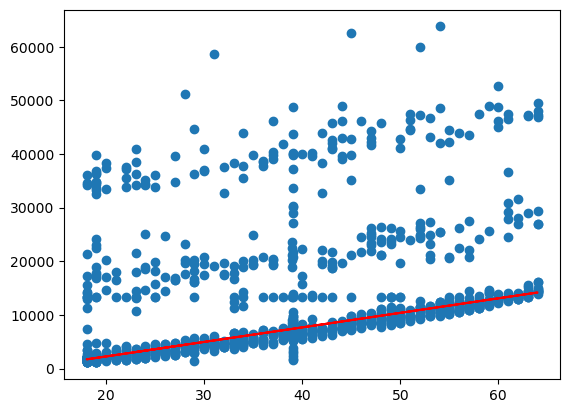

In [284]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r") #yapılan tahminleri görselleştiriyoruz.

In [285]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0])) #Bu değerlerle birlikte, modelin öğrendiği doğruyu ifade eden bir denklem elde edilir.

y = 3238.0527444176496 + 261.16134800211705 x


In [286]:
2987.315978866218 + 266.898565840756*38.0

13129.461480814947

Text(0, 0.5, 'charges(masraflar')

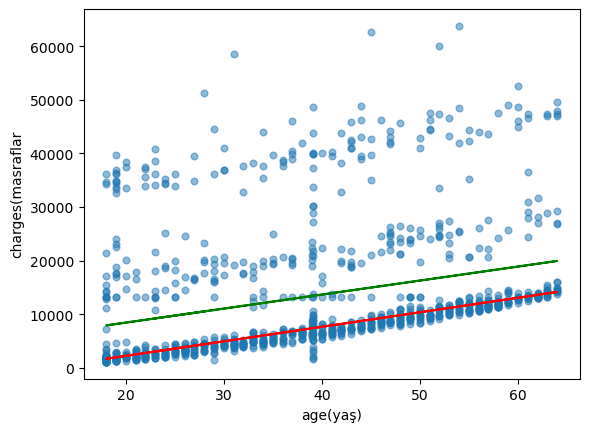

In [287]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g') #Doğrusal regresyon modelinin eğitim veri seti üzerindeki tahminini yeşil renkte çizer.
plt.plot(X_train, y_pred, color='r')#Başka bir modelin eğitim veri seti üzerindeki tahminini kırmızı renkte çizer.

plt.xlabel("age(yaş)")           # bu grafik ki farklı modelin gerçek değerlere ne kadar iyi uyduğunu ve birbirinden nasıl farklılaştığını anlamak için kullanılabilir.
plt.ylabel("charges(masraflar")

**Yeşil ve kırmızı çizgiler ise iki farklı modelin bu veri setine olan uyumunu temsil eder**

**TAHMİN**

In [288]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -3155.100407659008 + 270.8020286325782 x


**intercept_[0] ifadesi modelin kesişim noktasını (yani y-eksenini kestiği noktadaki değeri) ifade eder.coef_[0][0] ifadesi ise bağımsız değişkenin (x) katsayısını temsil eder.**

In [289]:
y_pred = svr_model.predict(X_test)

In [290]:
np.sqrt(mean_squared_error(y_test, y_pred))#model üzerinden test hatasını alalım

11989.222267630637

In [291]:
k_t = pd.DataFrame({"gercek_y": y_test,
                   "tahmin_y": y_pred}) 

In [292]:
k_t 

,gercek_y,tahmin_y
1210,5373.36425,6593.772623
1105,10338.93160,11468.209139
636,2709.11190,7419.033903
252,44260.74990,11468.209139
775,10560.49170,10655.803053
...,...,...
1079,15161.53440,13905.427396
463,11165.41765,12009.813196
866,1141.44510,1719.336108
945,11674.13000,7419.033903


**MODEL TUNING**

In [293]:
svr_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [294]:
svr_params = {"C": np.arange(0.3,2,0.5)} #0.3'den 2'ye kadar 0.5 artış yapan değerleri C olarak denesin
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 15).fit(X_train,y_train) #15 çapraz doğrulama ile en iyi paramtre değerini bul

In [295]:
svr_cv_model.best_params_ # çapraz doğrulama sonuçlarına dayanarak elde edilen en iyi hiperparametre setini elde ederiz.

{'C': 1.8}

In [296]:
svr_cv_model.best_params_["C"] #en iyi performansı gösteren "C" hiperparametresinin değerini sağlar.

1.8

In [297]:
svr_tuned = SVR(kernel= "linear", 
                C = svr_cv_model.best_params_["C"]).fit(X_train, y_train)


In [298]:
y_pred = svr_tuned.predict(X_test)

In [299]:
np.sqrt(mean_squared_error(y_test, y_pred)) #kök ortalama karesel hatayı buluyoruz.

11987.544177864493

**Tek değişken değil de tüm değişkenleri baz alıp SVR uygulayalım**

In [300]:
hit = pd.read_excel("güncellenmiş_veriSeti.xlsx")
df = hit.copy()
dms = pd.get_dummies(df[['sex', 'smoker', 'region']])
y = df["charges"]
X_ = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=60)

In [301]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [302]:
svr_params = {"C": np.arange(0.3,2,0.5)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 15).fit(X_train,y_train) #15 çapraz doğrulama ile eğitim verileri için en iyi paramtre değerini bul

In [303]:
svr_cv_model.best_params_

{'C': 1.8}

In [304]:
svr_cv_model.best_params_["C"]

1.8

In [305]:
svr_tuned = SVR(kernel= "linear", 
                C = svr_cv_model.best_params_["C"]).fit(X_train, y_train)


In [306]:
y_pred = svr_tuned.predict(X_test)

In [307]:
np.sqrt(mean_squared_error(y_test, y_pred))

11853.842272985545

In [308]:
k_t = pd.DataFrame({"gercek_y": y_test,
                   "tahmin_y": y_pred}) 

In [309]:
k_t

,gercek_y,tahmin_y
1210,5373.36425,6496.833566
1105,10338.93160,11085.080205
636,2709.11190,7357.621126
252,44260.74990,11965.255580
775,10560.49170,11078.122872
...,...,...
1079,15161.53440,14274.200747
463,11165.41765,12666.376161
866,1141.44510,1451.573625
945,11674.13000,7356.259084


In [310]:
r2=r2_score(y_test, y_pred) #Negatifsonucun gelmesini genellikle modelin seçilen bağımsız değişkenlere göre verileri kötü açıkladığı olarak yorumlayabiliriz.

In [311]:
r2

-0.17756877864779974

**TÜM MODELLERİN KARŞILAŞTIRILMASI**

In [312]:
from sklearn.metrics import accuracy_score

In [313]:
from sklearn.preprocessing import MinMaxScaler

# Ölçeklendirme işlemi
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)


In [314]:
from sklearn.metrics import mean_squared_error

modeller = [
    knn_tuned,
    cart_tuned,
    bag_tuned,
    svr_tuned,
]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test_scaled) if isimler == "SVR" else model.predict(X_test)
    dogruluk = mean_squared_error(y_test, y_pred)
    print("-" * 28)
    print(isimler + ":")
    print("Mean Squared Error: {:.4%}".format(dogruluk))


----------------------------
KNeighborsRegressor:
Mean Squared Error: 10699594141.7901%
----------------------------
DecisionTreeRegressor:
Mean Squared Error: 2915282229.1718%
----------------------------
BaggingRegressor:
Mean Squared Error: 3694375745.9058%
----------------------------
SVR:
Mean Squared Error: 38084029015.3558%


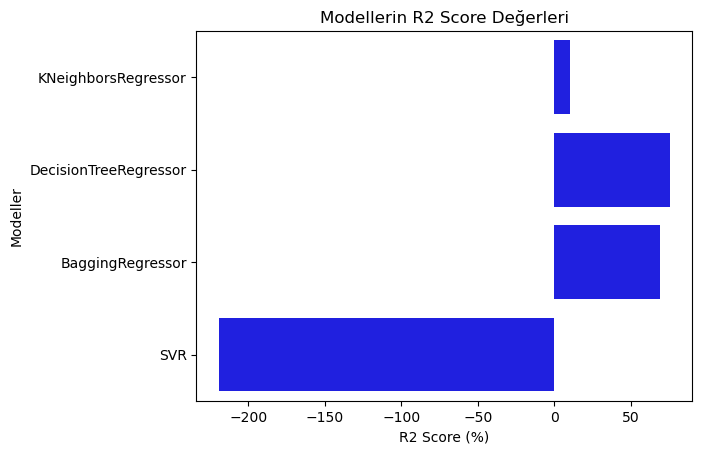

In [315]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

sonuclar = pd.DataFrame(columns=["Modeller", "R2 Score", "Mean Squared Error"])

for model in modeller:
    isimler = model.__class__.__name__
    if isimler == "SVR":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    # Regresyon ölçütlerini hesapla
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    # R2 Score ve Mean Squared Error değerlerini yüzde cinsinden ifade et
    r2_percentage = r2 * 100
    mse_percentage = mse * 100

    sonuc = pd.DataFrame([[isimler, r2_percentage, mse_percentage]], columns=["Modeller", "R2 Score", "Mean Squared Error"])
    sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)

sns.barplot(x='R2 Score', y='Modeller', data=sonuclar, color="b")
plt.xlabel('R2 Score (%)')
plt.title('Modellerin R2 Score Değerleri')
plt.show()


